In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import IPython
from scipy.io import wavfile

In [51]:
fs = 44100
Nx = 101
Nt = 500000
L = 0.7
dx = L / (Nx - 1)
f = 220
c = 2 * L * f
dt = 1 /fs
l = 5e-5
gamma = 5e-5

In [52]:
ya = np.linspace(0, 1, 70)
yb = np.linspace(1, 0, 31)
y0 = np.concatenate([ya, yb])

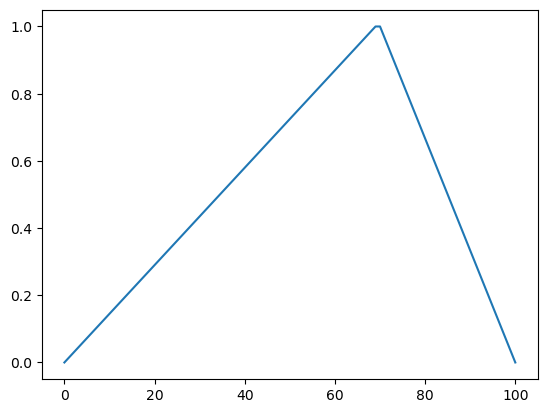

In [53]:
plt.plot(y0)

In [54]:
states = np.zeros((Nt, Nx))

In [55]:
states[0] = y0
states[1] = y0

In [56]:
def compute_states(d, time, length, dt, dx, l, gamma):
    for t in range(1, time - 1):
        for i in range(2, length - 2):
            outer_fact = (1 / (c ** 2 * dt ** 2) + gamma / (2 * dt)) ** (-1)
            p1 = 1 / dx ** 2 * (d[t][i-1] - 2 * d[t][i] + d[t][i+1])
            p2 = 1 / (c ** 2 * dt ** 2) * (d[t-1][i] - 2 * d[t][i])
            p3 = gamma / (2 * dt) * d[t-1][i]
            p4 = l ** 2 / dx ** 4 * (d[t][i+2] - 4 * d[t][i+1] + 6 * d[t][i] - 4 * d[t][i-1] + d[t][i-2])
            d[t+1][i] = outer_fact * (p1 - p2 + p3 - p4)
    return d

In [57]:
states = compute_states(states, Nt, Nx, dt, dx, l, gamma)

[0.         0.         0.01443917 0.02909431 0.04331603 0.05819534
 0.07218383 0.08730866 0.1010359  0.11644751 0.14493325 0.15942029
 0.17391304 0.1884058  0.20289855 0.2173913  0.23188406 0.24637681
 0.26086957 0.27536232 0.28985507 0.30434783 0.31884058 0.33333333
 0.34782609 0.36231884 0.37681159 0.39130435 0.4057971  0.42028986
 0.43478261 0.44927536 0.46376812 0.47826087 0.49275362 0.50724638
 0.52173913 0.53623188 0.55072464 0.56521739 0.57971014 0.5942029
 0.60869565 0.62318841 0.63768116 0.65217391 0.66666667 0.68115942
 0.69565217 0.71014493 0.72463768 0.73913043 0.75362319 0.76811594
 0.7826087  0.79710145 0.8115942  0.82608696 0.84057971 0.85507246
 0.86957161 0.8701489  0.85157133 0.85063825 0.83333743 0.83131511
 0.81492102 0.8121514  0.79634532 0.79312839 0.77762483 0.7742356
 0.75876618 0.75547014 0.73976855 0.73683655 0.72062362 0.71834709
 0.70131503 0.70001471 0.66666666 0.63333333 0.6        0.56666667
 0.53333333 0.5        0.46666667 0.43333333 0.4        0.366666

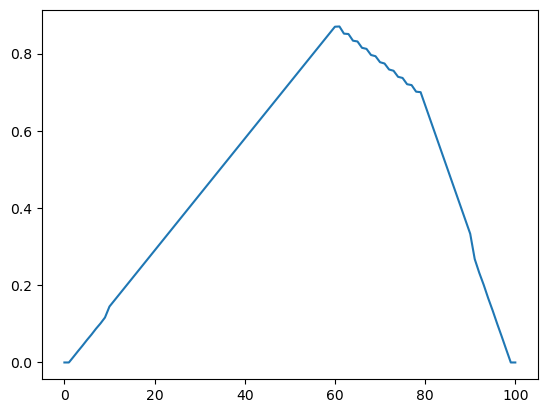

In [80]:
plt.plot(states[10])
print(states[10])

In [85]:
def compute_xmX(states):
    xmX = []
    for state in states:
        mX = []
        for n in range(10):
            sin_arr = np.sin(n * np.pi * np.linspace(0, 1, 101))
            mX.append(sum(sin_arr * state))
        
        xmX.append(np.array(mX))
    return np.array(xmX)

In [86]:
xmX = compute_xmX(states)

In [84]:
x = []
for mX in xmX:
    x.append(sum(mX) / Nx)

print(x[:100])

[0.29936795268745564, 0.29936795268745564, 0.29783024742804165, 0.2951966741116438, 0.29214327626488745, 0.28935479515819423, 0.2872364055231612, 0.28583856829406235, 0.284865821836205, 0.2838991308951751, 0.2825729495666228, 0.28076423318758603, 0.27857580557140704, 0.2762705220253606, 0.2740768141452144, 0.27209173143578463, 0.2702135710906772, 0.26823848967903113, 0.2659583361279869, 0.2632967020905645, 0.2603220079729307, 0.2572159166997978, 0.25414613792514923, 0.2511838361354254, 0.24825211638426167, 0.24518448752923636, 0.24181191371377855, 0.23806657091838423, 0.2340109341737886, 0.22980309381904226, 0.22559880508727262, 0.22136289693093297, 0.2170148658983639, 0.21252054601343331, 0.20781549554738596, 0.2028758322502297, 0.19770471698317024, 0.19234985966789797, 0.18685654110100944, 0.18124591631982687, 0.17548905168100815, 0.16951903040385602, 0.16326593943908402, 0.15669232996416874, 0.14982214523930668, 0.14271990024249892, 0.13545979561792848, 0.1280633505745606, 0.1204830

In [1]:
plt.plot(x)
IPython.display.Audio(x, rate=fs)

NameError: name 'x' is not defined

In [3]:
fs, ir = wavfile.read("impulse_response.wav")
ir = ir / np.max(abs(ir))

3709


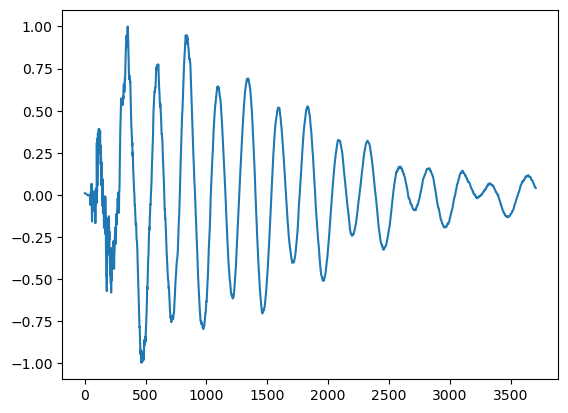

In [4]:
print(len(ir))
plt.plot(ir)
IPython.display.Audio(ir, rate=fs)

In [78]:
x = np.convolve(x, ir, mode='full')

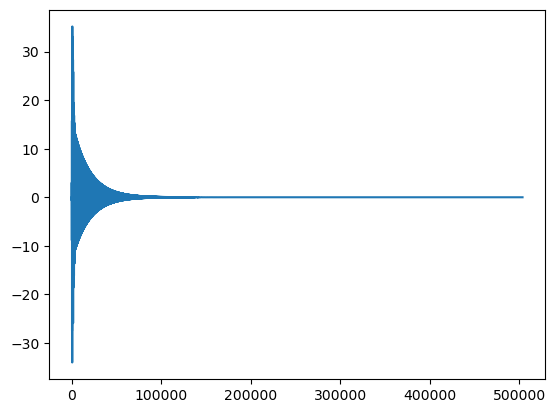

In [79]:
plt.plot(x)
IPython.display.Audio(x, rate=fs)